## Explore Weather Data: From Stations Around the Wind Farms
### *This notebook performs exploratory data analysis on downloaded weather data*

In [1]:
import os
import glob
import pandas as pd

In [2]:
project_name = "Thunder Ranch"
feature_name = "AWND"

In [14]:
def get_projects(basepath_flag = True):
    base_path = './data/weather/projects/*'
    projects =  glob.glob(base_path)
    if basepath_flag:
        return([os.path.basename(s) for s in projects])
    else:
        return(projects)

In [12]:
def get_project_stations(project_name):
    project_name = project_name.replace("/","&")
    base_path = './data/weather/projects/'
    search_path = base_path + project_name + '/*'
    project_station_dir =  glob.glob(search_path)
    return([os.path.basename(s) for s in project_station_dir])

In [5]:
def get_features_project_stations(project_name, stationid, basepath_flag = True):
    project_name = project_name.replace("/","&")
    stationid = stationid.replace(":", "_")
    base_path = './data/weather/projects/'
    station_weather_features = glob.glob(base_path + project_name + '/' + stationid + '/*.csv')
    if basepath_flag:
        return([os.path.basename(s).replace('.csv', '') for s in station_weather_features])
    else:
        return(station_weather_features)

In [9]:
def get_data_features_project_stations(project_name, stationid, feature):
    project_name = project_name.replace("/","&")
    stationid = stationid.replace(":", "_")
    base_path = './data/weather/projects/'
    feature_path = base_path + project_name + '/' + stationid + '/' + feature + '.csv'
    return(pd.read_csv(feature_path))

In [24]:
all_data = pd.DataFrame()
collected_projects = get_projects(basepath_flag=True)
for p in collected_projects:
    project_stations = get_project_stations(p)
    for s in project_stations:
        station_features = get_features_project_stations(p, s)
        for f in station_features:
            data = get_data_features_project_stations(p, s, f)
            data['p_name'] = p
            all_data = all_data.append(data)

In [25]:
all_data.shape

(35652, 6)

In [26]:
all_data.head()

,attributes,datatype,date,station,value,p_name
0,",,W,",WSF5,2017-01-01T00:00:00,GHCND:USW00023047,42.9,Panhandle Wind 1
1,",,W,",WSF5,2017-01-02T00:00:00,GHCND:USW00023047,32.0,Panhandle Wind 1
2,",,W,",WSF5,2017-01-03T00:00:00,GHCND:USW00023047,30.0,Panhandle Wind 1
3,",,W,",WSF5,2017-01-04T00:00:00,GHCND:USW00023047,36.0,Panhandle Wind 1
4,",,W,",WSF5,2017-01-05T00:00:00,GHCND:USW00023047,30.0,Panhandle Wind 1


#### Plot weather data

In [63]:
stationids = get_project_stations(project_name)
s = stationids[1]
wind_features = get_features_project_stations(project_name, stationid)
f = wind_features[-1]

In [86]:
def plot_weather_feature_time_series(project_name, station, feature):
    df = get_data_features_project_stations(project_name, station, feature)
    df.index = pd.to_datetime(df['date'])
    plt.figure()
    df['value'].plot()

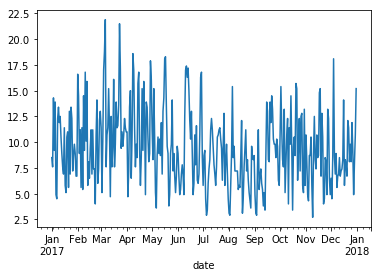

In [87]:
plot_weather_feature_time_series(project_name, s, f)